In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Flatten

In [2]:
# Dataset 
# mnist
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:

# 로드된 데이터셋확인
print('train :', X_train.shape, y_train.shape)
print('test :', X_test.shape, y_test.shape)

train : (60000, 28, 28) (60000,)
test : (10000, 28, 28) (10000,)


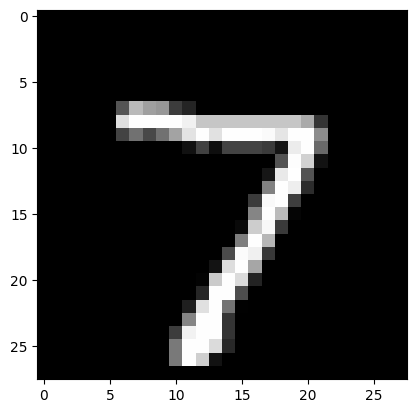

In [4]:
plt.imshow(X_test[0], cmap='gray')

In [5]:
# 정규화 Nomalize

X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'), # 0~1 사이의 값으로 변경하는 활성함수
])

In [8]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['acc'])

In [9]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2535 - acc: 0.9251 - val_loss: 0.1198 - val_acc: 0.9633
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1052 - acc: 0.9678 - val_loss: 0.0900 - val_acc: 0.9709
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0750 - acc: 0.9769 - val_loss: 0.0838 - val_acc: 0.9736
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0572 - acc: 0.9819 - val_loss: 0.0841 - val_acc: 0.9758
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0471 - acc: 0.9851 - val_loss: 0.0896 - val_acc: 0.9731
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0392 - acc: 0.9873 - val_loss: 0.0815 - val_acc: 0.9774
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0322 - acc: 0.9894 - val_loss: 0.0868 - val_acc: 0.9753
Epoch 8/10
1875/1875 [==============================] - 13s

In [10]:
# h5 format
model.save('h5-mnist.h5')

## 딥러닝은 학습의 기간이 너무 길기 때문에 저장해 놓고 불러오는 방식을 취한다.
## .h5의 확장자를 사용하지 않으면 하나의 폴더로 생성된다.

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1046 - acc: 0.9742


[0.10458054393529892, 0.9742000102996826]

In [14]:
# model.predict(X_test[0]) ==> 에러 발생

inp = tf.expand_dims(X_test[0], 0) # axis = 0 의 차원을 추가한다.
print(X_test[0].shape, inp.shape)
pred = model.predict(inp)

(28, 28) (1, 28, 28)
1/1 [==============================] - 0s 53ms/step


In [16]:
# pred 는 0~9 까지의 인덱스를 지니고 0~1 사이의 값을 지닌다(softmax)
## argmax를 통해서 가장 값이 높은 인덱스 값을 반환한다.

np.argmax(pred)

7